In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import os 

# Pilot 1. 기본 실험 

In [9]:
data_dir = '/Volume/VAD/LifeLongerAD/results/CViT/MVTecAD/CViT_3first/seed_0/result.csv'
df = pd.read_csv(data_dir)
df.loc[::2,'task-agnostic'] = 'specific'
df.loc[1::2,'task-agnostic'] = 'agnostic'    

In [12]:
temp = df[df['task-agnostic']=='agnostic'].reset_index(drop=True)

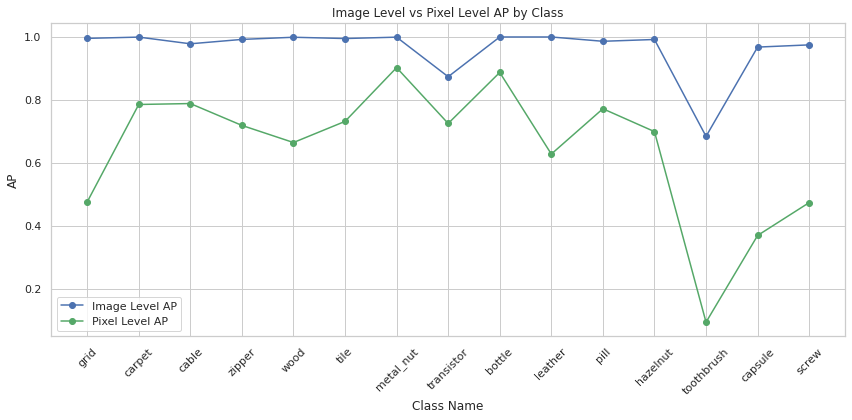

In [16]:
# 시각화 설정
sns.set(style="whitegrid")


# 5. 이미지 레벨과 픽셀 레벨 AUROC 비교 시각화
plt.figure(figsize=(12, 6))
plt.plot(temp['GT_class_name'], temp['img_level_average_precision'], marker='o', label='Image Level AP', color='b')
plt.plot(temp['GT_class_name'], temp['pix_level_average_precision'], marker='o', label='Pixel Level AP', color='g')
plt.title('Image Level vs Pixel Level AP by Class')
plt.xlabel('Class Name')
plt.ylabel('AP')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Pilot - 2. CViT 

In [3]:
df_dir = '/Volume/VAD/LifeLongerAD/results/CViT/MVTecAD/CViT_3first/seed_0/result.csv'
df = pd.read_csv(df_dir).round(3)
# Split the dataset into two parts: task-agnostic and task-specific
agnostic_df = df[df['class_name'] != df['GT_class_name']]
specific_df = df[df['class_name'] == df['GT_class_name']]
df['task-agnostic'] = ''
df.loc[::2,'task-agnostic'] = 'specific'
df.loc[1::2,'task-agnostic'] = 'agnostic'

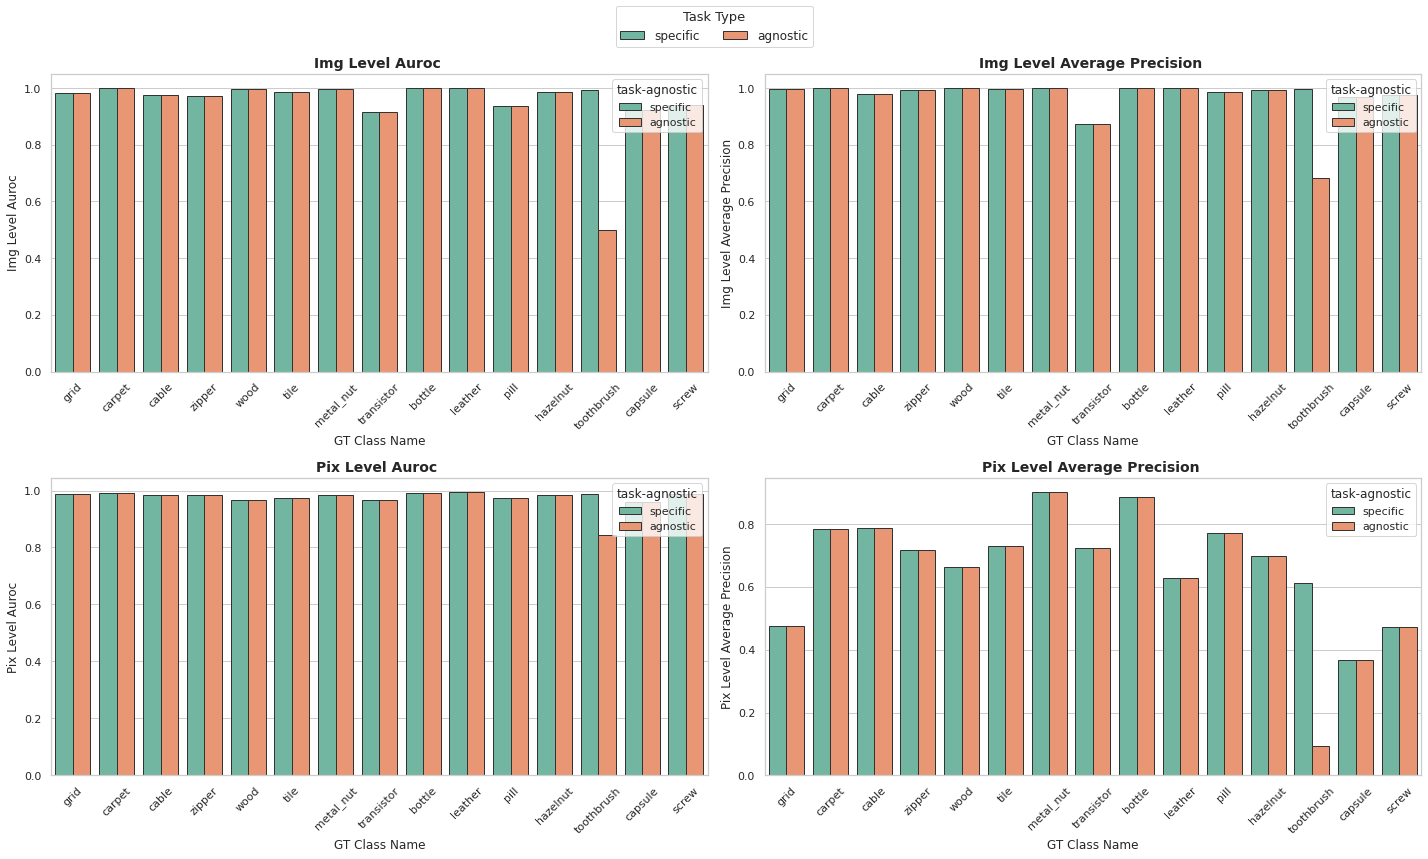

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일 설정
sns.set_theme(style="whitegrid")

# 데이터프레임을 df로 설정했다고 가정합니다.
metrics = ['img_level_auroc', 'img_level_average_precision', 'pix_level_auroc', 'pix_level_average_precision']

# 전체 플롯 설정: 플롯을 2x2 형태로 나누어 생성합니다.
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()  # 쉽게 반복문을 돌리기 위해 배열을 평평하게 만듭니다.

# 각 메트릭에 대해 서브플롯 그리기
for i, metric in enumerate(metrics):
    sns.barplot(
        x='GT_class_name',
        y=metric,
        hue='task-agnostic',
        data=df,
        palette='Set2',  # 색상 팔레트 설정
        edgecolor=".2",
        ax=axes[i]  # 각 서브플롯에 대해 특정 축을 지정
    )
    # 각 서브플롯의 제목과 레이블 추가
    axes[i].set_title(f'{metric.replace("_", " ").title()} ', fontsize=14, weight='bold')
    axes[i].set_xlabel('GT Class Name', fontsize=12)
    axes[i].set_ylabel(metric.replace("_", " ").title(), fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# 범례는 모든 서브플롯에서 공유하도록 설정
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Task Type', title_fontsize='13', fontsize='12', loc='upper center', ncol=2)

# 그래프 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 범례 공간을 확보하기 위해 그래프 크기를 조금 줄임
plt.show()


# Pilot 2-1 grid 먼저 CViT 

In [36]:
df_dir = '/Volume/VAD/LifeLongerAD/results/LANGCAD/MVTecAD/MVTecAD_VisA_mix/seed_0/result.csv'
df = pd.read_csv(df_dir).round(3)
# Split the dataset into two parts: task-agnostic and task-specific
agnostic_df = df[df['class_name'] != df['GT_class_name']]
specific_df = df[df['class_name'] == df['GT_class_name']]
df['task-agnostic'] = ''
df.loc[::2,'task-agnostic'] = 'specific'
df.loc[1::2,'task-agnostic'] = 'agnostic'

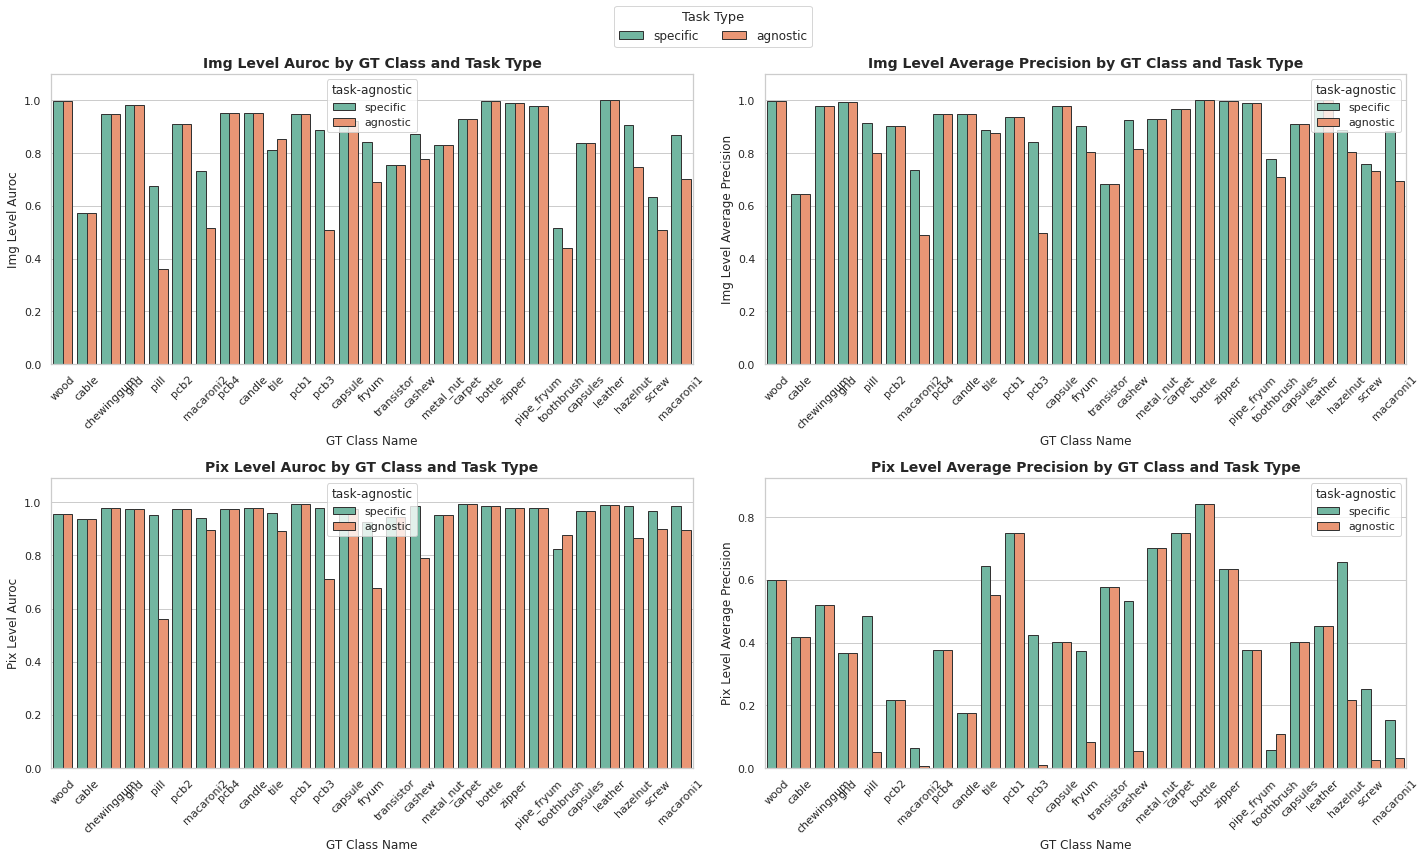

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일 설정
sns.set_theme(style="whitegrid")

# 데이터프레임을 df로 설정했다고 가정합니다.
metrics = ['img_level_auroc', 'img_level_average_precision', 'pix_level_auroc', 'pix_level_average_precision']

# 전체 플롯 설정: 플롯을 2x2 형태로 나누어 생성합니다.
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()  # 쉽게 반복문을 돌리기 위해 배열을 평평하게 만듭니다.

# 각 메트릭에 대해 서브플롯 그리기
for i, metric in enumerate(metrics):
    sns.barplot(
        x='GT_class_name',
        y=metric,
        hue='task-agnostic',
        data=df,
        palette='Set2',  # 색상 팔레트 설정
        edgecolor=".2",
        ax=axes[i]  # 각 서브플롯에 대해 특정 축을 지정
    )
    # 각 서브플롯의 제목과 레이블 추가
    axes[i].set_title(f'{metric.replace("_", " ").title()} by GT Class and Task Type', fontsize=14, weight='bold')
    axes[i].set_xlabel('GT Class Name', fontsize=12)
    axes[i].set_ylabel(metric.replace("_", " ").title(), fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    
    # y축의 상한을 기존 최대값보다 조금 더 여유롭게 설정
    y_max = df[metric].max() * 1.1  # 최대값의 110%로 설정하여 여유를 줌
    axes[i].set_ylim(0, y_max)

# 범례는 모든 서브플롯에서 공유하도록 설정
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Task Type', title_fontsize='13', fontsize='12', loc='upper center', ncol=2)

# 그래프 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 범례 공간을 확보하기 위해 그래프 크기를 조금 줄임
plt.show()


In [26]:
# MVTecAD 'capsule hazelnut transistor cable bottle carpet grid leather metal_nut pill screw tile toothbrush wood zipper'
# VISA  'candle capsules cashew chewinggum fryum macaroni1 macaroni2 pcb1 pcb2 pcb3 pcb4 pipe_fryum'


a = 'capsule hazelnut transistor cable bottle carpet grid leather metal_nut pill screw tile toothbrush wood zipper candle capsules cashew chewinggum fryum macaroni1 macaroni2 pcb1 pcb2 pcb3 pcb4 pipe_fryum'.split(' ')
np.random.shuffle(a)

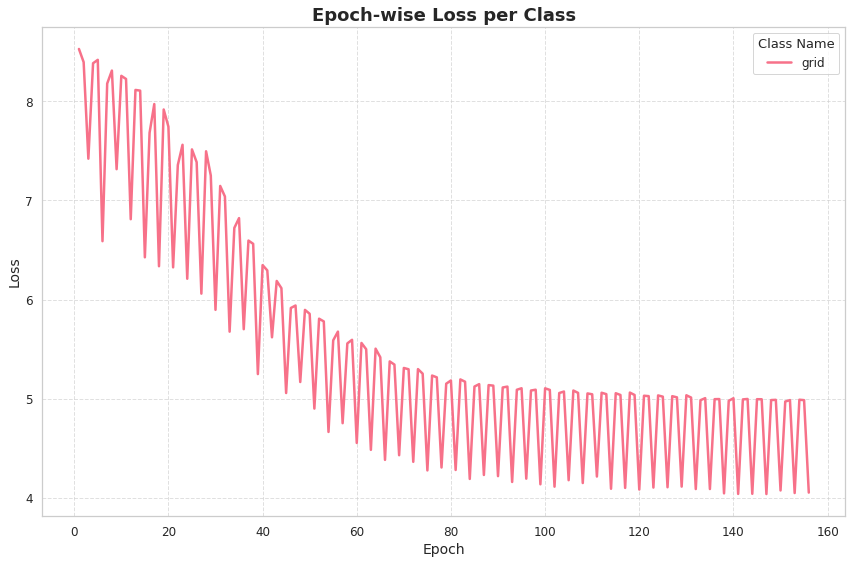

In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# 로그 파일 경로 설정
log_file_path = '/Volume/VAD/LifeLongerAD/results/LANGCAD/MVTecAD/LANGCAD_prompt_lang_baseline_promptwithinput/seed_0/train.log'

# 클래스별 loss를 저장할 딕셔너리 초기화
epoch_losses = defaultdict(list)
current_class = None

# 로그 파일 파싱
with open(log_file_path, 'r') as file:
    for line in file:
        # 클래스 이름 파싱
        class_match = re.search(r'Current Class Name : (\w+)', line)
        if class_match:
            current_class = class_match.group(1)
        
        # epoch loss 파싱
        epoch_loss_match = re.search(r'\[\s*\d+/\d+\] Loss: [\d\.]+ \((\d+\.\d+)\)', line)
        if epoch_loss_match and current_class:
            loss = float(epoch_loss_match.group(1))
            epoch_losses[current_class].append(loss)

# 필터링할 클래스 지정 (None이면 모든 클래스 포함)
classes_to_include = None  # 예: ['ClassA', 'ClassB']

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 클래스별 loss 그래프 그리기
plt.figure(figsize=(12, 8))
color_palette = sns.color_palette("husl", len(epoch_losses))

for (class_name, losses), color in zip(epoch_losses.items(), color_palette):
    if classes_to_include is None or class_name in classes_to_include:
        plt.plot(range(1, len(losses) + 1), losses, label=class_name, linewidth=2.5, color=color)

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Epoch-wise Loss per Class', fontsize=18, fontweight='bold')
plt.legend(title='Class Name', fontsize=12, title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

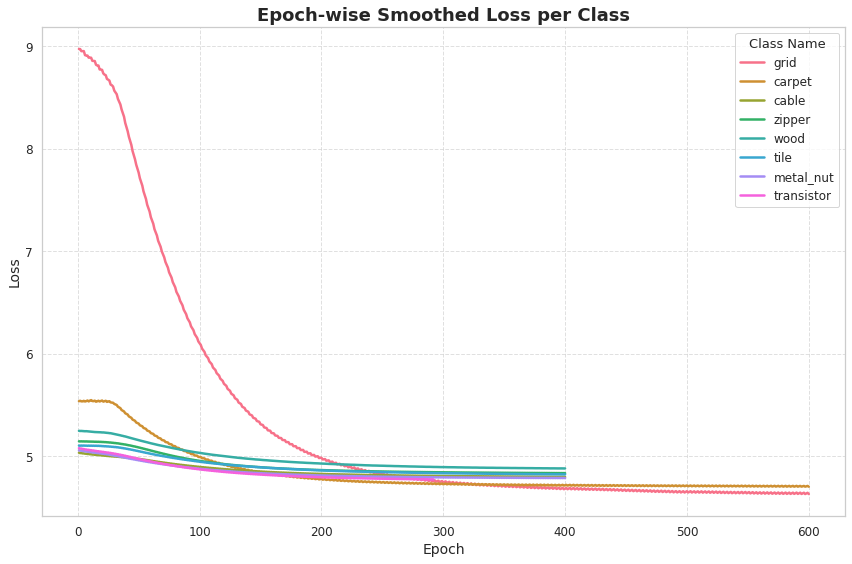

In [8]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict

# 로그 파일 경로 설정
log_file_path = '/Volume/VAD/LifeLongerAD/results/LANGCAD/MVTecAD/LANGCAD_prompt_lang_baseline_batch128/seed_0/train.log'

# 클래스별 loss를 저장할 딕셔너리 초기화
epoch_losses = defaultdict(list)
current_class = None

# 로그 파일 파싱
with open(log_file_path, 'r') as file:
    for line in file:
        # 클래스 이름 파싱
        class_match = re.search(r'Current Class Name : (\w+)', line)
        if class_match:
            current_class = class_match.group(1)
        
        # epoch loss 파싱
        epoch_loss_match = re.search(r'\[\s*\d+/\d+\] Loss: [\d\.]+ \((\d+\.\d+)\)', line)
        if epoch_loss_match and current_class:
            loss = float(epoch_loss_match.group(1))
            epoch_losses[current_class].append(loss)

# 필터링할 클래스 지정 (None이면 모든 클래스 포함)
classes_to_include = None  # 예: ['ClassA', 'ClassB']

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 클래스별 loss 그래프 그리기
plt.figure(figsize=(12, 8))
color_palette = sns.color_palette("husl", len(epoch_losses))

for (class_name, losses), color in zip(epoch_losses.items(), color_palette):
    if classes_to_include is None or class_name in classes_to_include:
        # 이동 평균을 사용하여 스무싱 적용
        smoothed_losses = pd.Series(losses).ewm(span=100, adjust=False).mean()
        plt.plot(range(1, len(smoothed_losses) + 1), smoothed_losses, label=class_name, linewidth=2.5, color=color)

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Epoch-wise Smoothed Loss per Class', fontsize=18, fontweight='bold')
plt.legend(title='Class Name', fontsize=12, title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


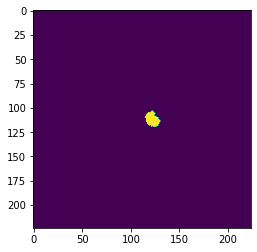

In [47]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

img_dir = '/Volume/VAD/Data/mvtec2d-sam-b/toothbrush/train/good/001.png'
img = cv2.imread(img_dir)
img[img!=11] = 0
plt.imshow(img[:,:,0])
plt.show()